In [1]:
from prml.linear import (
    LinearRegression, RidgeRegression, BayesianRegression
)
from prml.preprocess import PolynomialFeature
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

In [2]:
train_set = np.genfromtxt('1.csv', delimiter=',')
test_set = np.genfromtxt('2.csv', delimiter=',')

## Split the features and targets
x_train, y_train = train_set[:, 0], train_set[:, 1]
x_test, y_test = test_set[:, 0], test_set[:, 1]

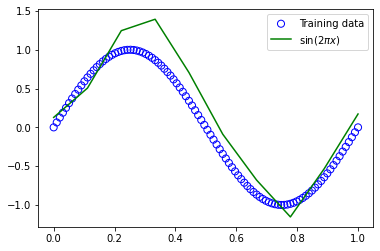

In [3]:
# plot the training dataset as scatters and plot the test dataset as line plot.
plt.scatter(x_train, y_train, facecolor='none', edgecolors='b', s=50, label='Training data')
plt.plot(x_test, y_test, color='g', label='$\sin(2 \pi x)$')
plt.legend()
plt.show()

In [4]:
def rmse(a, b): #compute error 
    return np.sqrt(np.mean(np.square(a - b)))

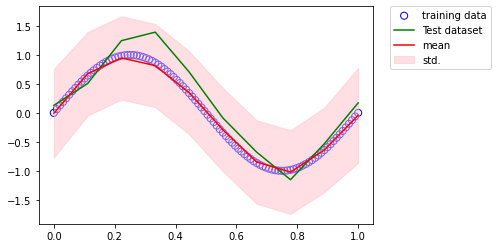

In [5]:
feature = PolynomialFeature(9)  # a model of degree 9 overfits the data
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

# this model can returns the mean and the standard deviation of the predictions
y, std = model.predict(X_test, return_std=True)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="Test dataset")
plt.plot(x_test, y, c="r", label="mean")

# visualize the standard deviation of the predictive distribution
plt.fill_between(x_test, y - std, y + std, color="pink", label="std.", alpha=0.5)


plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()